In [22]:
import pyxdf
import PyQt5
import mne
import numpy as np
import pathlib
import mne
import matplotlib
import matplotlib.pyplot as plt
# For interactive plots
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'qt')
from subfunctions import read_xdf, add_annot

In [23]:
current_path = pathlib.Path().absolute()  
data_fname = current_path /'Data'/'P300_Gilad.xdf'

raw,events = read_xdf(fname = data_fname)
raw = add_annot(raw, events)

2 streams loaded
Creating RawArray with float64 data, n_channels=13, n_times=31405
    Range : 0 ... 31404 =      0.000 ...   251.232 secs
Ready.


## Prepro

In [24]:
raw.filter(l_freq=0.5,h_freq=None)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 825 samples (6.600 sec)



<RawArray | 13 x 31405 (251.2 s), ~3.1 MB, data loaded>

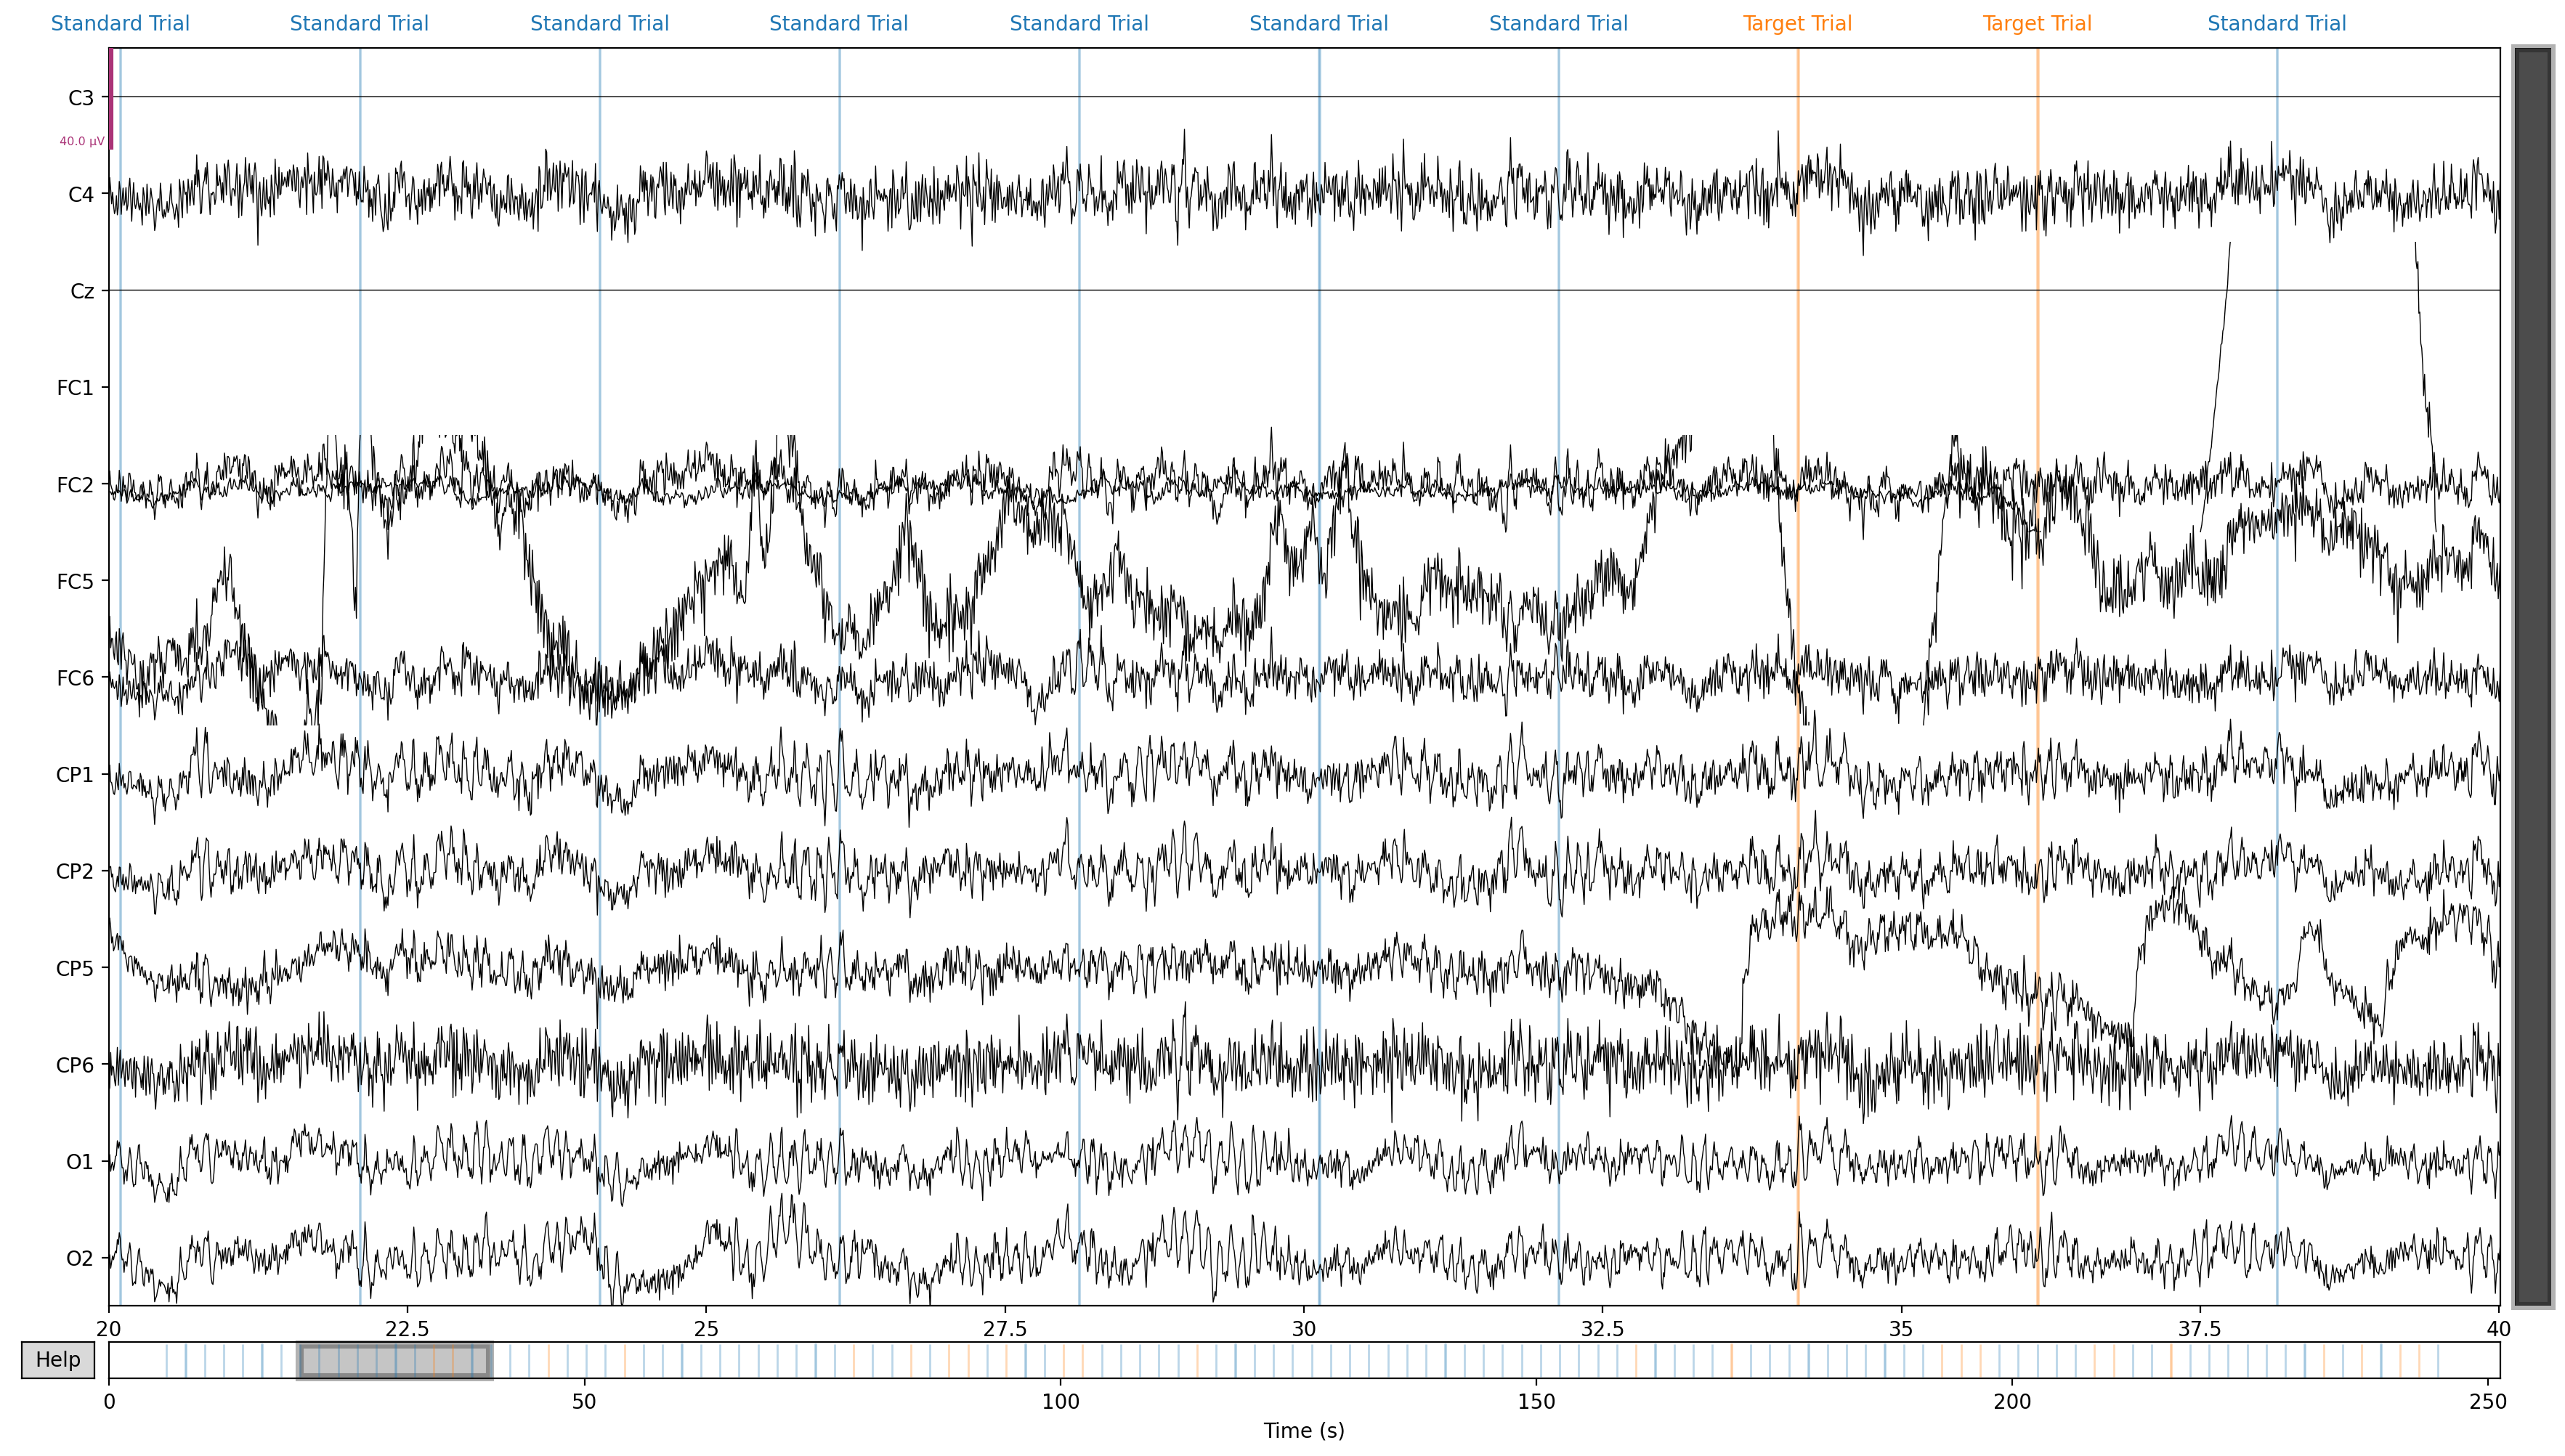

Channels marked as bad:
none


In [25]:
raw.plot(duration=20,start=20)

In [5]:
raw.drop_channels(raw.info['bads'])

<RawArray | 9 x 31405 (251.2 s), ~2.2 MB, data loaded>

## Epoching

In [9]:
events_from_annot, event_dict = mne.events_from_annotations(raw)
epochs = mne.Epochs(raw, events_from_annot, tmin=-0.2, tmax=0.6, event_id=event_dict,detrend=0,baseline= (-0.2,0))



Used Annotations descriptions: ['Standard Trial', 'Target Trial']
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


## Plot Epochs

In [12]:
fig, ax = plt.subplots(3,2)

epochs['Target Trial'].plot_image(picks='eeg', combine='mean',axes=ax[:,0],title="standard")
epochs['Standard Trial'].plot_image(picks='eeg', combine='mean',axes=ax[:,1],title="odd")

plt.show


Using data from preloaded Raw for 24 events and 101 original time points ...
0 bad epochs dropped
Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"
Using data from preloaded Raw for 96 events and 101 original time points ...
0 bad epochs dropped
Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


<function matplotlib.pyplot.show(*, block=None)>

### Plot evoked data

No projector specified for this dataset. Please consider the method self.add_proj.


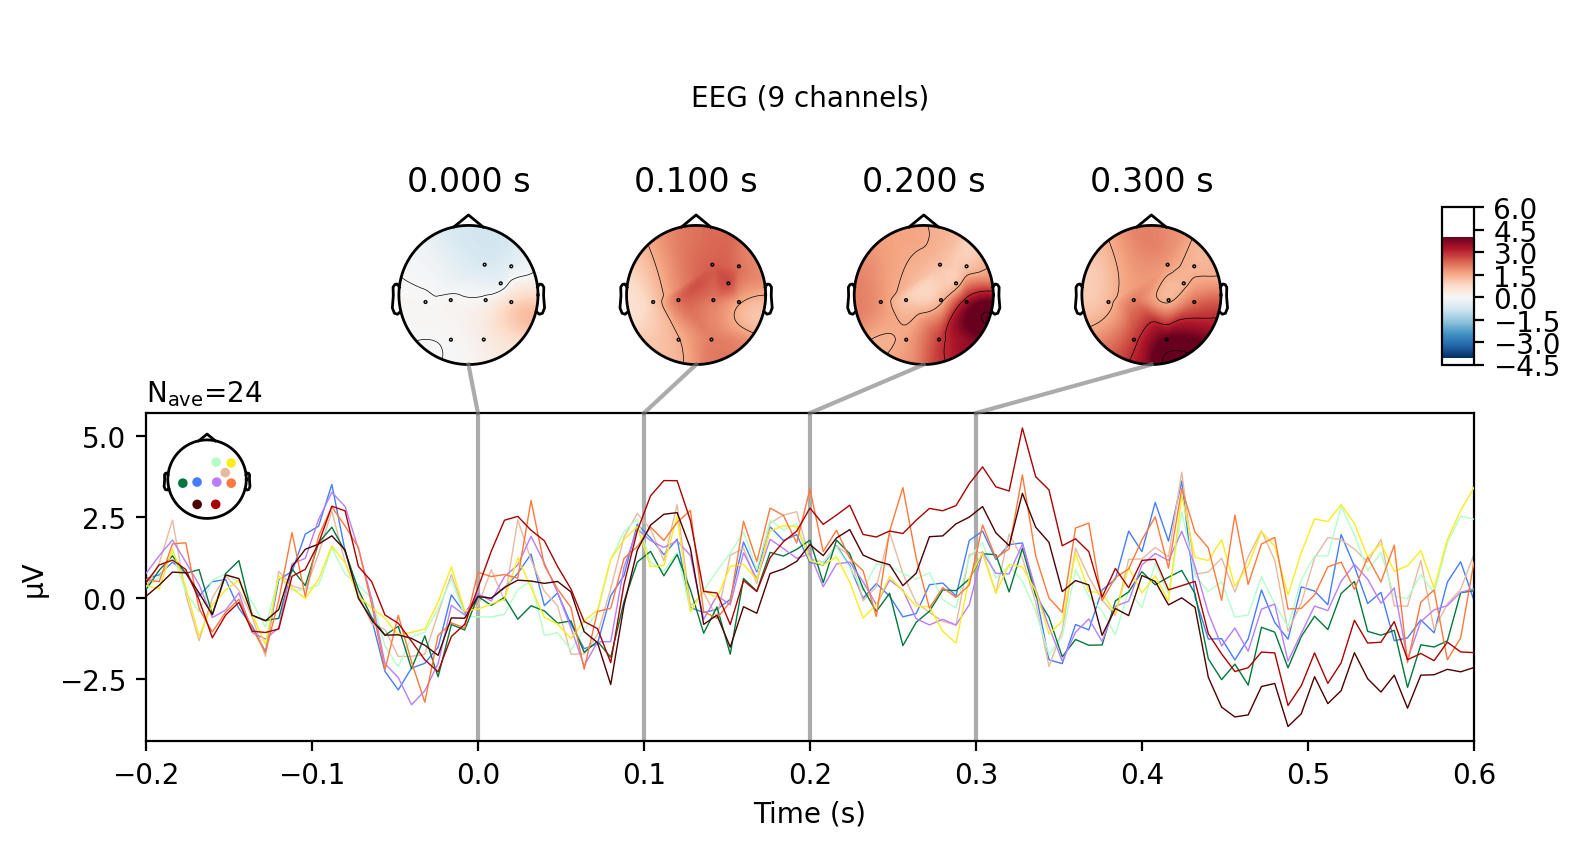

In [26]:
fig, ax = plt.subplots(2)


par_picks = ['CP1','CP2'] # to plot only parietal

odd_evoked =  epochs['Target Trial'].average()
stand_evoked =  epochs['Standard Trial'].average()


odd_evoked.plot_joint(picks='eeg',times=[0,0.1,0.2,0.3])




In [26]:
fig, ax = plt.subplots(2)



P300_window = [0.25,0.4]
par_picks = ['CP1','CP2'] # to plot only parietal


odd_evoked.plot(gfp=True,
    highlight=P300_window,axes=ax[0],titles='odd')

stand_evoked.plot(gfp=True,
    highlight=P300_window,axes=ax[1],titles='standard')

plt.show()

In [25]:
mne.viz.plot_compare_evokeds(dict(stand=stand_evoked, odd=odd_evoked),combine='mean',show_sensors= True,vlines= [0.3] )

combining channels using "mean"
combining channels using "mean"


[<Figure size 1600x1200 with 2 Axes>]

Using data from preloaded Raw for 120 events and 101 original time points ...
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"
Using data from preloaded Raw for 24 events and 101 original time points ...
Not setting metadata
24 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


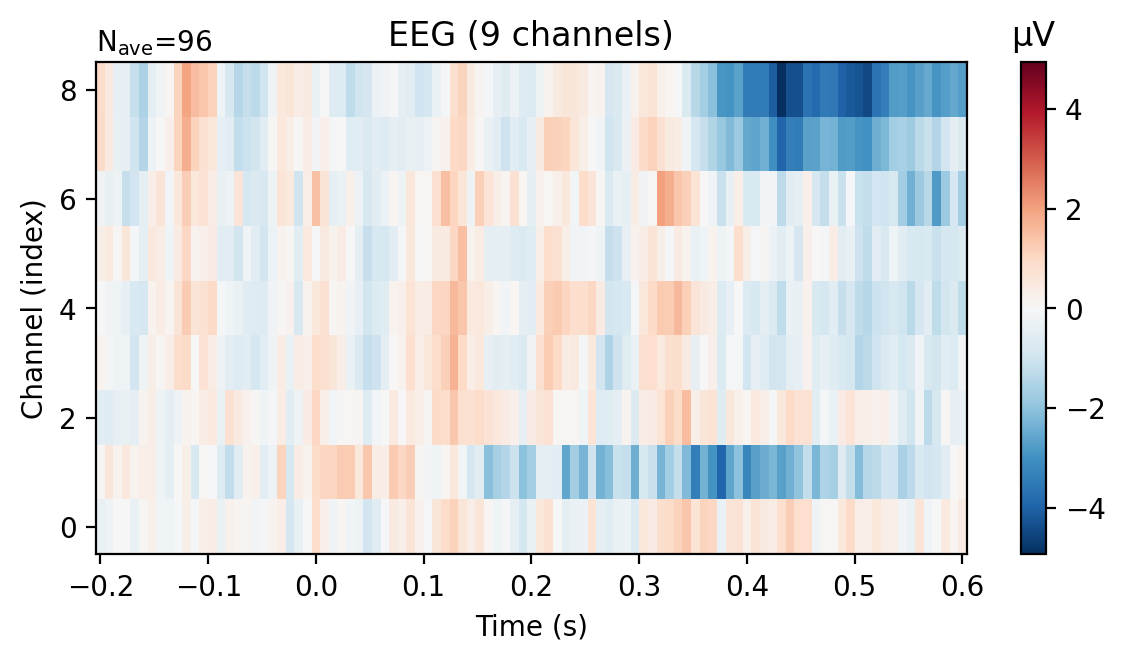

In [29]:
stand_evoked.plot_image()

In [28]:
# Each electrode indvidually 

mne.viz.plot_compare_evokeds(dict(stand=stand_evoked, odd=odd_evoked),axes='topo',vlines=[0,0.3])

[<Figure size 3584x1888 with 10 Axes>]